**<h3>Libaries</h3>**
1. Importing ***pandas*** for reading the dataset and operating on it.<br>
2. Importing ***matplotlib.pyplot*** and ***seaborn*** for data visualization.<br>
3. Importing ***confusion_matrix*** and ***classification_report*** from ***sklearn.metrics*** for showing **Confusion Matrix, Accuracy, Precesion, Recall, F1 Score**.<br>
4. Importing ***plot_confusion_matrix*** to visualize the confusion matrix from ***mlxtend.plotting***.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

**Reading the dataset**<br>
Here, we are using ***read_csv*** module of ***pandas*** to read the csv formatted dataset named *cardio_train.csv* from Google Drive.

In [ ]:
from google.colab import files

uploaded = files.upload()

data = pd.read_csv('cardio_train.csv', sep = ';')
data

**<h3>Contents of the dataset</h3>**
There are 13 columns and 70000 rows in this dataset.
1. ***id***: This is unique for all the data.
2. ***age***: Here, age is given in days.
3. ***gender***:
    Women = 1 and
    Men = 2
4. ***height***: Here, height is given in cm.
5. ***weight***: Here, weight is given in kg.
6. ***ap_hi***: Systolic blood pressure
7. ***ap_lo***: Diastolic blood pressure
8. ***cholesterol***:
    Normal = 1,
    Above normal = 2 and
    Well above normal = 3
9. ***gluc***:
    Normal = 1,
    Above normal = 2 and
    Well above normal = 3
10. ***smoke***: Smoker or not. Binary.
11. ***alco***: Drink or not. Binary.
12. ***active***: Does physical excercise or not. Binary.
13. ***cardio*** [Target]: Has heart disease or not. Binary.


# Preparing the dataset.


1. Here the unique ID for all the data is not needed. So we can delete than column.
2. The ***'age'*** is in **days**. Converting to **year** will give us some upperhand.

In [ ]:
#deleting 'id'
del data["id"]

#converting the 'age' from day to year
data["age"] //= 365

Now we need to check if the there is any null value in the dataset.

In [ ]:
data.isnull().values.any() #Gives boolean value as output (i.e. True or False)

False

In [ ]:
data.isna().sum() #Detailed check for null value

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

As we can see there is no null value in the dataset. So, now we can process further.

# Quality check of the dataset.

In [ ]:
values = data['cardio'].value_counts()

values

0    35021
1    34979
Name: cardio, dtype: int64

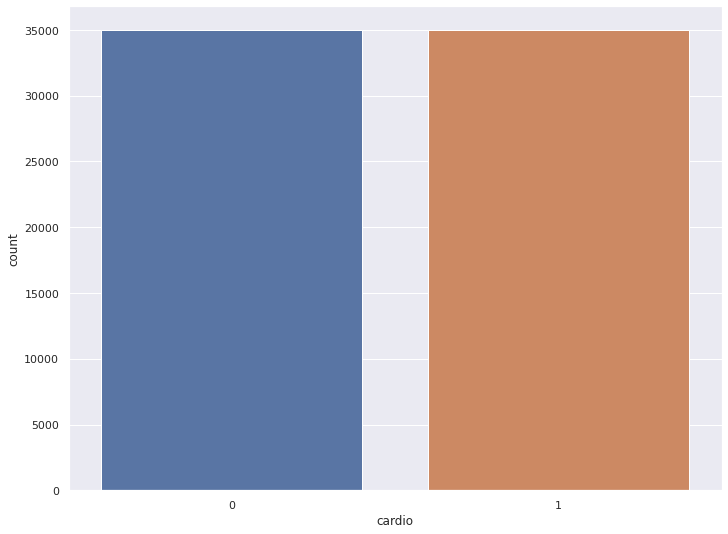

In [ ]:
#Visualizing
seaborn.set(rc={'figure.figsize':(11.7,8.9)})
seaborn.countplot(x = data['cardio'])

We can see that the dataset has quite balanced data, where almost half of the population have cardiovascular diseases and half of them don't.<br>
**Comment:** QC Passed

# Data visualization
Now we will see the hue of cardiovascular diseases in terms of age, height, weight, smoke, and so on.<br>
This visualization will give us some general overview about the nature of the data which we are working with.<br>
**Nerd info:**<br>
We will use *sklearn* and *matplotlib.pyplot*.<br>
Here,
1. x-axis will be variable
2. hue = "cardio"
3. data = data (dataset we are working with)
4. palette = "colorblind"
5. edgecolor = "dark"
<br><br>
✔ $\color{#c38820}{\text{This color means, the data has cardiovascular disease.}}$<br>
✖ $\color{#176d9c}{\text{This color means, the data doesn't have cardiovascular disease.}}$


In [ ]:
seaborn.set(rc={'figure.figsize':(12,9)}) #setting the figure size

**<h4>Age</h4>**
Here we can see that, heart diseases increase with age. When a person is in his 60s, there is a high chance of getting cardiovascular diseases.

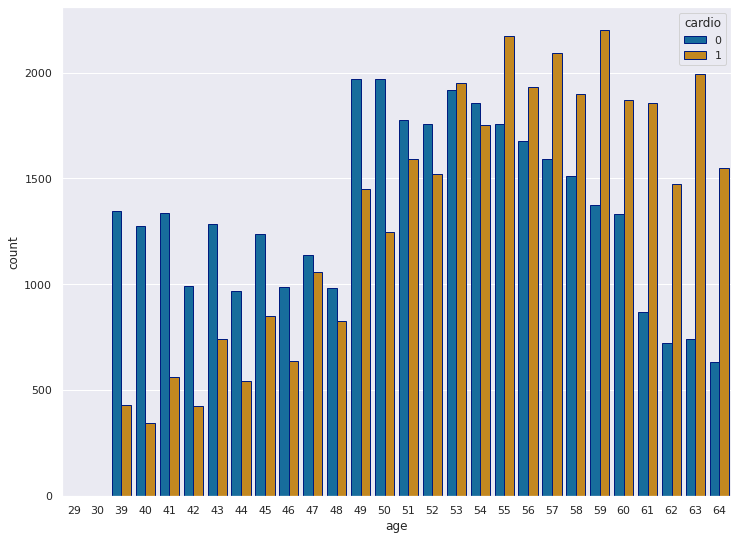

In [ ]:
seaborn.countplot(x = "age", hue = "cardio", data = data, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

**<h4>Gender</h4>**
Here we can see that, our dataset has a greater number of women than men, and the ratio of cardio 0:1, is almost 50-50. Which concludes that, CVDs (cardiovascular diseases) are almost gender neutral.


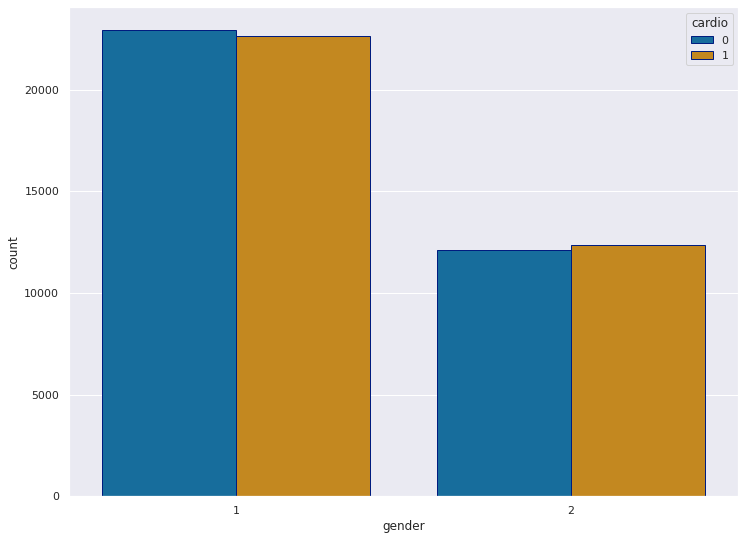

In [ ]:
seaborn.countplot(x = "gender", hue = "cardio", data = data, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

**<h4>BMI</h4>**
As we already know, we don't have any attributes for BMI. But we have the attributes to calculate the BMI.
$$
B M I=\frac{\text { weight }(\mathrm{kg})}{\text { height }^{2}\left(\mathrm{~m}^{2}\right)}
$$
From this equation, we can easily calculate the BMI of every population in the dataset by using height and weight attributes.<br><br>
**Note:** In our dataset, the height is given in centimeter. We will convert it to meter by dividing by 100.<br>
<center><img src = 'https://files.prokerala.com/health/images/bmi-category.png'></center>

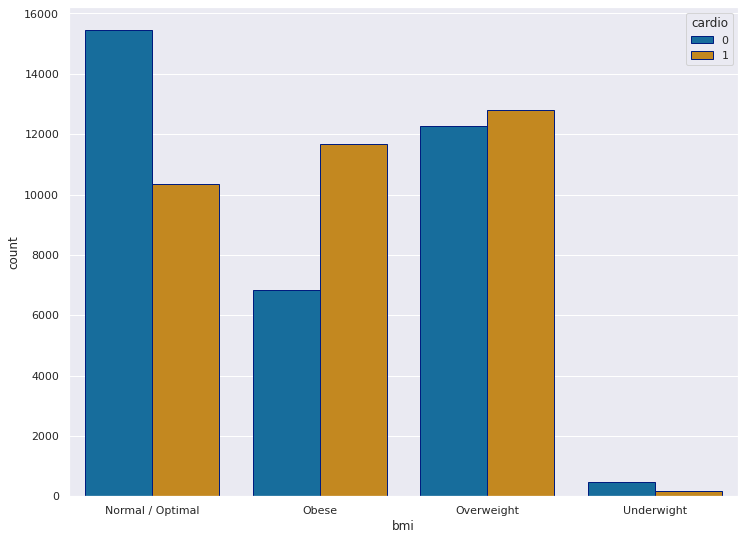

In [ ]:
data['bmi'] = data['weight']/((data['height']/100)**2)

pd.options.mode.chained_assignment = None #To removing SettingWithCopyWarning in pandas

for i in range(len(data['bmi'])):
    if 0 < data['bmi'][i] < 18.5:
        data['bmi'][i] = 'Underwight'
    elif 18.5 < data['bmi'][i] < 25:
        data['bmi'][i] = 'Normal / Optimal'
    elif 25 < data['bmi'][i] < 30:
        data['bmi'][i] = 'Overweight'
    else:
        data['bmi'][i] = 'Obese'

seaborn.countplot(x = "bmi", hue = "cardio", data = data, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

Here the observation is, the more risk of getting CVDs is when a person is Obese, and Overweight.

**<h4>Glucose</h4>**
We have less data on glucose level 2 and 3. But in those data, the cardio 0:1 ratio is much higher towards cardio: 1.<br>
This concludes that, higher the glucose level, the higher the chances of having CVDs.

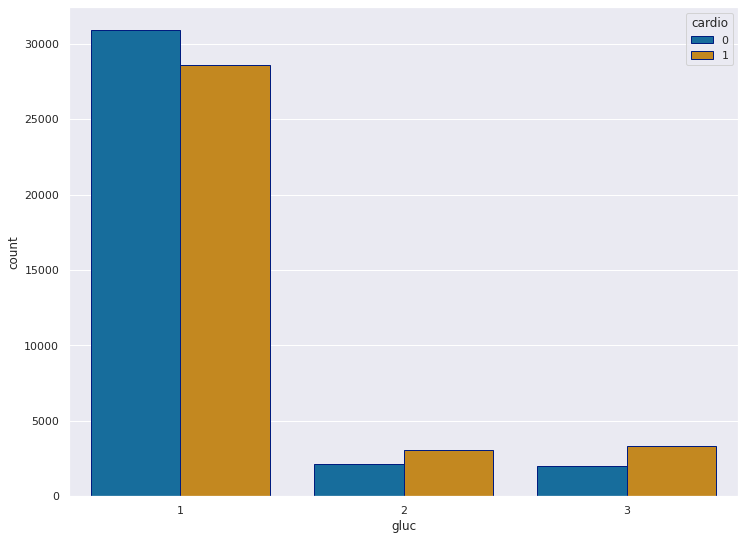

In [ ]:
seaborn.countplot(x = "gluc", hue = "cardio", data = data, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

**<h4>Cholesterol</h4>**
We also have less data on cholestorel level 2 and 3. But in those data, the cardio 0:1 ratio is much higher towards cardio: 1.<br>
This concludes that, higher the cholesterol level, the higher the chances of having CVDs.

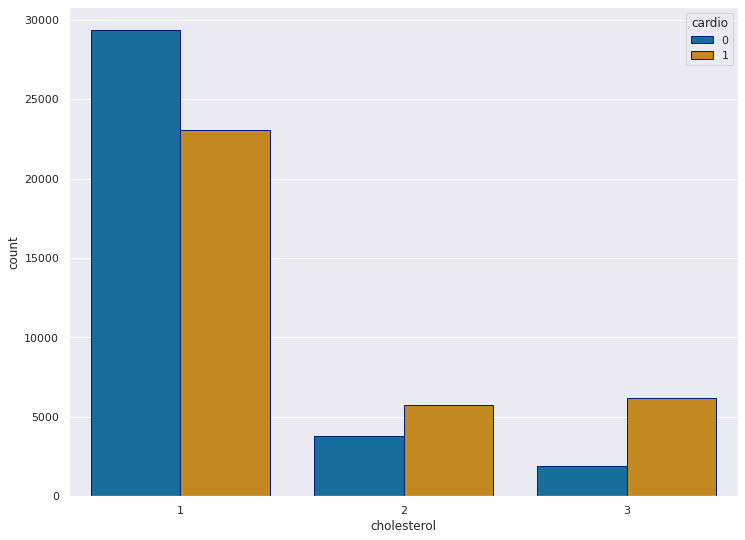

In [ ]:
seaborn.countplot(x = "cholesterol", hue = "cardio", data = data, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

**<h4>Physical Excercise</h4>**
People who don't workout have higher cardio ratio than of those who workout.<br>
0 = Do not workout<br>
1 = Do workout

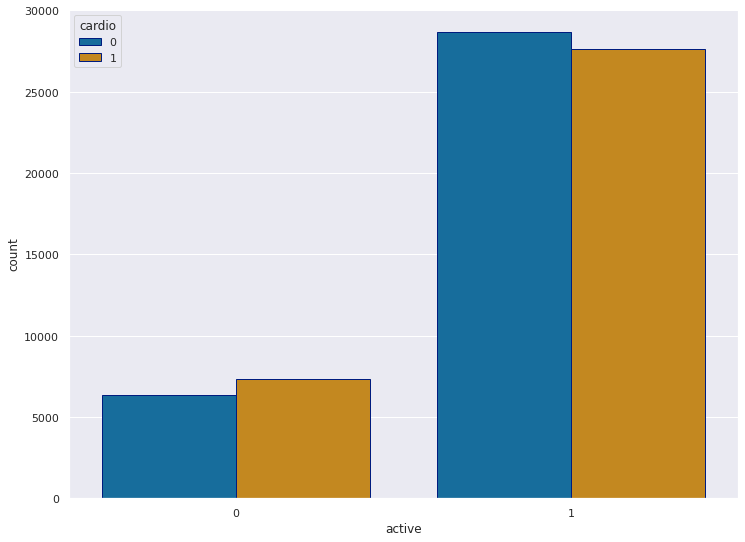

In [ ]:
seaborn.countplot(x = "active", hue = "cardio", data = data, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

Here is a summary of BMI and Age relating to CVDs, showing in boxplot and kdeplot.

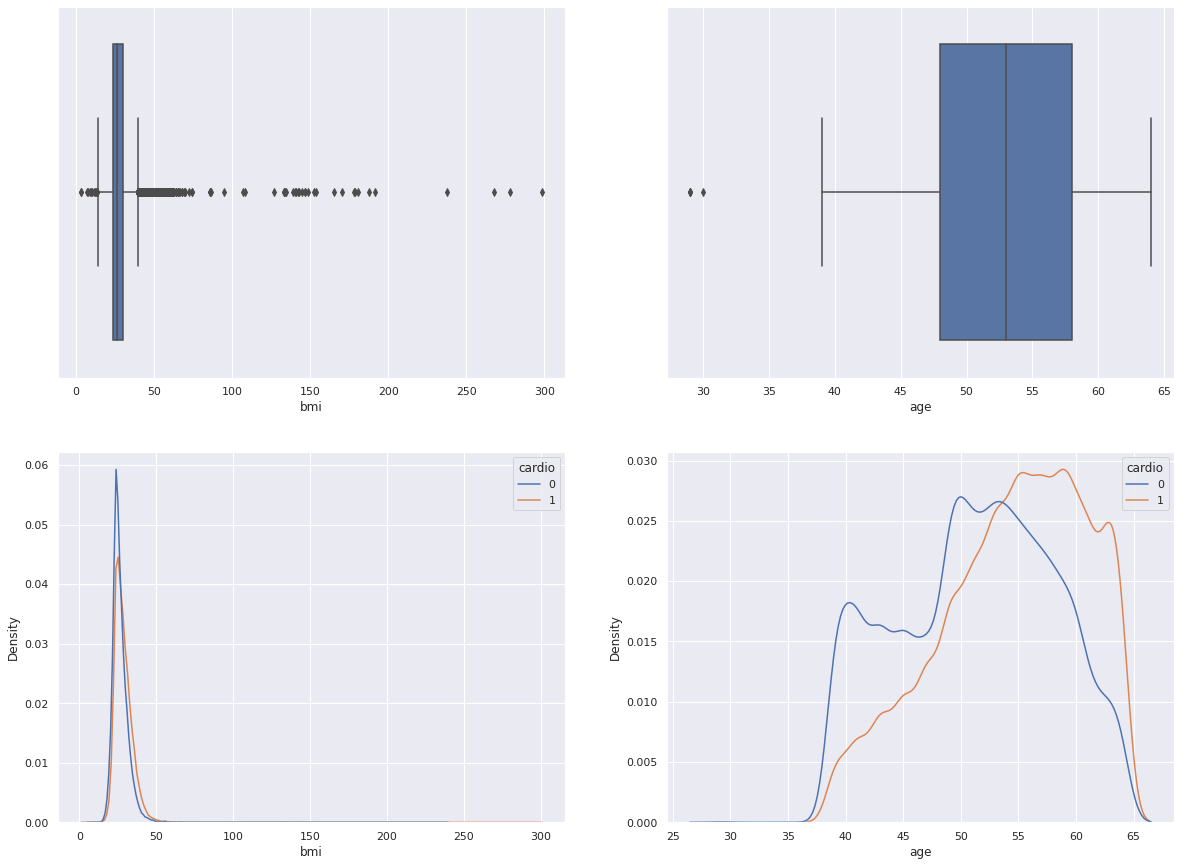

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (20, 15))
data['bmi'] = data['weight']/((data['height']/100)**2)
seaborn.boxplot(data = data, x='bmi', ax=ax[0,0])
seaborn.boxplot(data = data, x='age', ax=ax[0,1])

seaborn.kdeplot(x = data['bmi'], hue= data['cardio'], ax= ax[1,0])
seaborn.kdeplot(x = data['age'], hue= data['cardio'], ax= ax[1,1])
plt.show()

Now that we have visualized many of the data, we can restore the dataset to default attributes by deleting 'bmi' to work on it.

In [ ]:
del data["bmi"]

<h4>Here is the correlation of between the attributes.

In [ ]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


<h4>Here is the heatmap from the correlation.

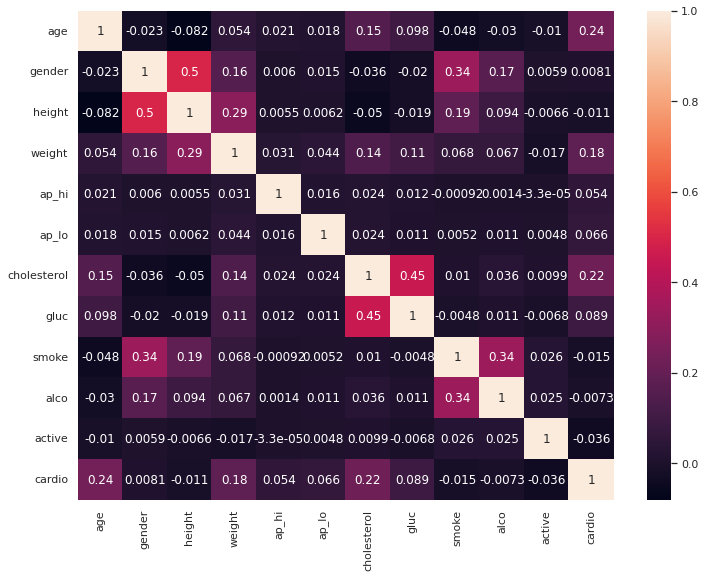

In [ ]:
seaborn.heatmap(data.corr(), annot = True)

<h4>Here is the mathematical brief description of the attributes.

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the dataset for train and test
We are using ***iloc*** from *pandas* for general split.<br>
Than, we are going to import ***train_test_split*** from ***sklearn.model_selection***. And going to use this module to split the data into **80%** of train data naming, *xtrain* and *ytrain* and **20%** of test data naming *xtest*, *ytest*.

In [ ]:
x = data.iloc[:,:-1]; x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y = data.iloc[:, -1]; y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

print("Size of train data:", xtrain.shape)
print("Size of test data:", xtest.shape)

Size of train data: (49000, 11)
Size of test data: (21000, 11)


Here 80% of 70,000 are 56,000<br>
and 20% of 70,000 are 14,000<br><br>
**Comment:** Splitting succesful!

#Training and Testing
Now that we are finally ready to train and test our data using some algoritms i.e. Random Forest, Logistic Regression etc.<br><br>
We are going create an object for all the imported algorithm classifiers form ***sklearn***, and than we are going to call the ***fit*** function for the object to train the data and than we are going to test it.


**<h3>1. Random Forest</h3>**

**Algorithm brief:** Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.<br>

**After running the algoritm:**
*   Accuracy for the train data is: **98%**
*   Accuracy for the test data is: **71%**

In [ ]:
from sklearn.ensemble import RandomForestClassifier #importing the algorithm

rfc_object = RandomForestClassifier() #creating an object under it.

rfc_object.fit(xtrain, ytrain) #training the dataset

train_score = rfc_object.score(xtrain, ytrain)
test_score = rfc_object.score(xtest, ytest)

print(f"The taining accuracy of the model is: {train_score}")
print(f"The test accuracy of the model is: {test_score}")

The taining accuracy of the model is: 0.9822857142857143
The test accuracy of the model is: 0.7082380952380952


**Confusion Matrix and Performance calculation:**
* Confusion matrix (Color Blue)
* Accuracy
* Precision
* Recall
* F1 Score

Confusion matrix:
[[7466 2886]
 [3241 7407]]

Visualizing:


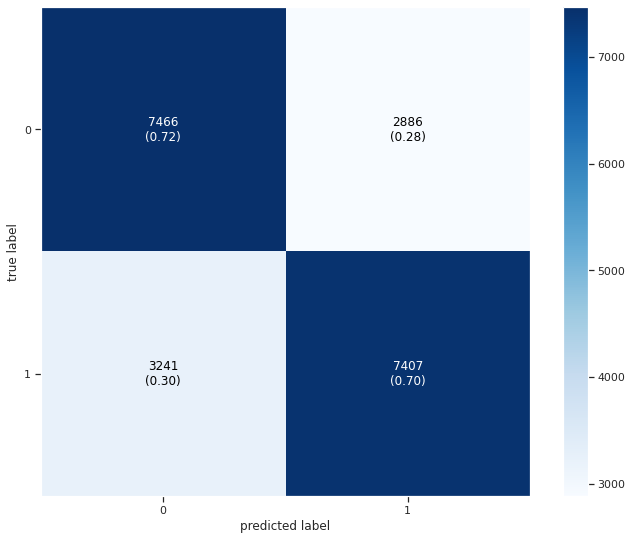


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10352
           1       0.72      0.70      0.71     10648

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



In [ ]:
pred = rfc_object.predict(xtest)
cm = confusion_matrix(ytest, pred)
print("Confusion matrix:", cm, sep = '\n')
print()
print("Visualizing:")
fig, ax = plot_confusion_matrix(conf_mat = cm, show_absolute = True, show_normed = True, colorbar = True, cmap = "Blues")
plt.show()
print()
print("Classification Report:", classification_report(ytest, pred), sep = '\n')

**<h3>2. Logistic Regression</h3>**

**Algorithm brief:** Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.<br>

**After running the algoritm:**
*   Accuracy for the train data is: **72%**
*   Accuracy for the test data is: **72%**

In [ ]:
from sklearn.linear_model import LogisticRegression #importing the algorithm

lr_object = LogisticRegression(solver='lbfgs', max_iter=1000) #creating an object under it.

lr_object.fit(xtrain, ytrain) #training the dataset

train_score = lr_object.score(xtrain, ytrain)
test_score = lr_object.score(xtest, ytest)

print(f"The taining accuracy of the model is: {train_score}")
print(f"The test accuracy of the model is: {test_score}")

The taining accuracy of the model is: 0.7234693877551021
The test accuracy of the model is: 0.7188571428571429


**Confusion Matrix and Performance calculation:**
* Confusion matrix (Color Blue)
* Accuracy
* Precision
* Recall
* F1 Score

Confusion matrix:
[[7972 2380]
 [3524 7124]]

Visualizing:


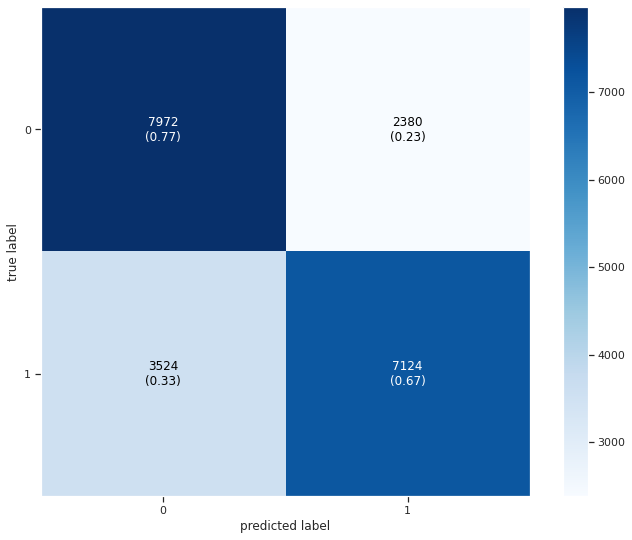


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73     10352
           1       0.75      0.67      0.71     10648

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [ ]:
pred = lr_object.predict(xtest)
cm = confusion_matrix(ytest, pred)
print("Confusion matrix:", cm, sep = '\n')
print()
print("Visualizing:")
fig, ax = plot_confusion_matrix(conf_mat = cm, show_absolute = True, show_normed = True, colorbar = True, cmap = "Blues")
plt.show()
print()
print("Classification Report:", classification_report(ytest, pred), sep = '\n')

**<h3>3. Multi-layer Perceptron</h3>**

**Algorithm brief:** A multilayer perceptron is a fully connected class of feedforward artificial neural network. The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons.<br>

**After running the algoritm:**
*   Accuracy for the train data is: **72%**
*   Accuracy for the test data is: **72.6%**



In [ ]:
from sklearn.neural_network import MLPClassifier #importing the algorithm

MLP_object = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=1000) #creating an object under it.

MLP_object.fit(xtrain, ytrain) #training the dataset

train_score = MLP_object.score(xtrain, ytrain)
test_score = MLP_object.score(xtest, ytest)

print(f"The taining accuracy of the model is: {train_score}")
print(f"The test accuracy of the model is: {test_score}")

The taining accuracy of the model is: 0.7228163265306122
The test accuracy of the model is: 0.7212857142857143


**Confusion Matrix and Performance calculation:**
* Confusion matrix (Color Blue)
* Accuracy
* Precision
* Recall
* F1 Score

Confusion matrix:
[[8191 2161]
 [3692 6956]]

Visualizing:


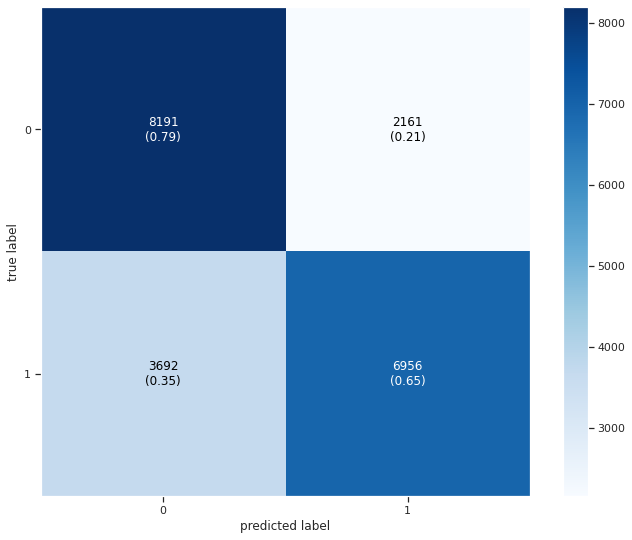


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     10352
           1       0.76      0.65      0.70     10648

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



In [ ]:
pred = MLP_object.predict(xtest)
cm = confusion_matrix(ytest, pred)
print("Confusion matrix:", cm, sep = '\n')
print()
print("Visualizing:")
fig, ax = plot_confusion_matrix(conf_mat = cm, show_absolute = True, show_normed = True, colorbar = True, cmap = "Blues")
plt.show()
print()
print("Classification Report:", classification_report(ytest, pred), sep = '\n')

**<h3>4. K-Nearest Neighbor</h3>**

**Algorithm brief:** The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.<br>

**After running the algoritm:**
*   Accuracy for the train data is: **75%**
*   Accuracy for the test data is: **71%**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #importing the algorithm

knn = KNeighborsClassifier(n_neighbors = 11) #creating an object under it.

knn.fit(xtrain, ytrain) #training the dataset

train_score = knn.score(xtrain, ytrain)
test_score = knn.score(xtest, ytest)

print(f"The taining accuracy of the model is: {train_score}")
print(f"The test accuracy of the model is: {test_score}")

The taining accuracy of the model is: 0.7521428571428571
The test accuracy of the model is: 0.7081904761904761


**Confusion Matrix and Performance calculation:**
* Confusion matrix (Color Blue)
* Accuracy
* Precision
* Recall
* F1 Score

Confusion matrix:
[[7752 2600]
 [3528 7120]]

Visualizing:


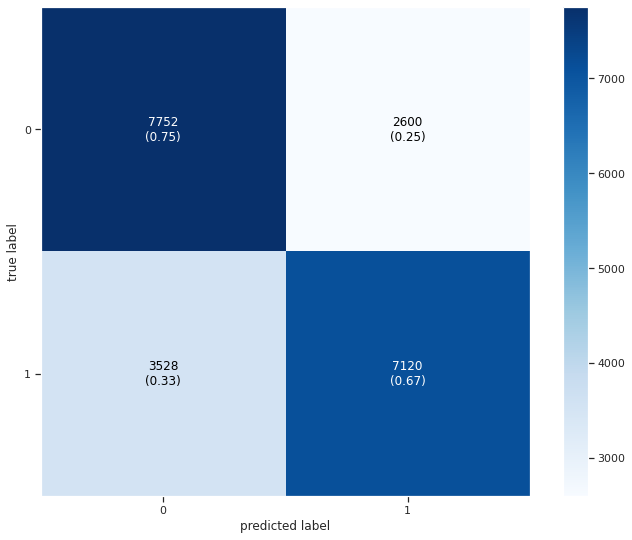


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10352
           1       0.73      0.67      0.70     10648

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



In [ ]:
pred = knn.predict(xtest)
cm = confusion_matrix(ytest, pred)
print("Confusion matrix:", cm, sep = '\n')
print()
print("Visualizing:")
fig, ax = plot_confusion_matrix(conf_mat = cm, show_absolute = True, show_normed = True, colorbar = True, cmap = "Blues")
plt.show()
print()
print("Classification Report:", classification_report(ytest, pred), sep = '\n')

**<h3>5. Support Vector Machine: C-support Vector Classification</h3>**

**Algorithm brief:** SVC is a nonparametric clustering algorithm that does not make any assumption on the number or shape of the clusters in the data. It is known that, this algorithm works best for low-dimensional data, so if the data is high-dimensional, a preprocessing step, e.g. using principal component analysis, is usually required.<br>

**After running the algoritm:**
*   Accuracy for the train data is: **72%**
*   Accuracy for the test data is: **72%**



In [ ]:
from sklearn.svm import SVC #importing the algorithm

svc_object = SVC() #creating an object under it.

svc_object.fit(xtrain, ytrain) #training the dataset

train_score = svc_object.score(xtrain, ytrain)
test_score = svc_object.score(xtest, ytest)

print(f"The taining accuracy of the model is: {train_score}")
print(f"The test accuracy of the model is: {test_score}")

The taining accuracy of the model is: 0.7198367346938775
The test accuracy of the model is: 0.7192857142857143


**Confusion Matrix and Performance calculation:**
* Confusion matrix (Color Blue)
* Accuracy
* Precision
* Recall
* F1 Score

Confusion matrix:
[[8501 1851]
 [4044 6604]]

Visualizing:


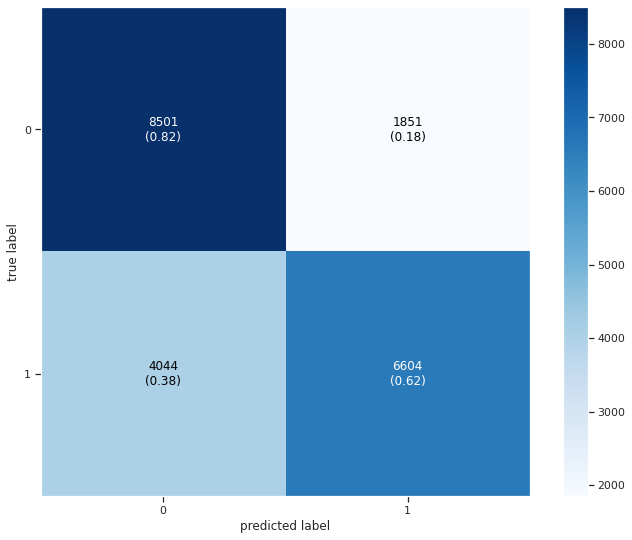


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74     10352
           1       0.78      0.62      0.69     10648

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000



In [ ]:
pred = svc_object.predict(xtest)
cm = confusion_matrix(ytest, pred)
print("Confusion matrix:", cm, sep = '\n')
print()
print("Visualizing:")
fig, ax = plot_confusion_matrix(conf_mat = cm, show_absolute = True, show_normed = True, colorbar = True, cmap = "Blues")
plt.show()
print()
print("Classification Report:", classification_report(ytest, pred), sep = '\n')